To get insights into the identification process by ``dPULearn().fit``,  you can create a Principal Component Analysis (PCA) plot for  identified negative, positive, and unlabeled dataset groups. To this end, we load an example dataset and perform a ``PCA-based identification`` of negatives: 

In [1]:
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False
# Dataset with positive (γ-secretase substrates)
# and unlabeled data (proteins with unknown substrate status)
df_seq = aa.load_dataset(name="DOM_GSEC_PU")
labels = df_seq["label"].to_numpy()
n_pos = sum([x == 1 for x in labels])
df_feat = aa.load_features(name="DOM_GSEC")
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
X = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts)
# PCA-based identification of 'n_pos' negatives
dpul = aa.dPULearn().fit(X, labels=labels, n_unl_to_neg=n_pos)
df_pu = dpul.df_pu_
labels = dpul.labels_

To visualize all identified negatives within the compressed feature space represented by the first two Principal Components (PCs), you can use the ``dPULearnPlot.pca`` method:

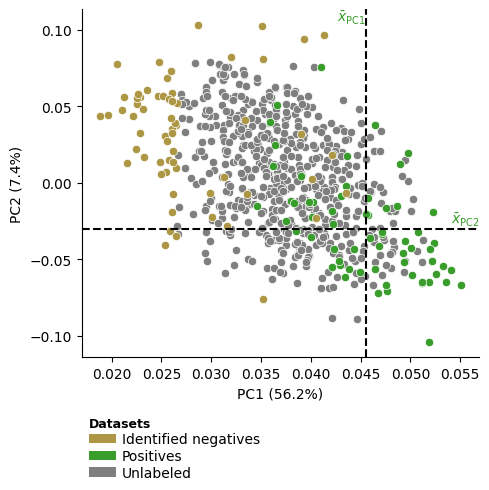

In [2]:
dpul_plot = aa.dPULearnPlot()
dpul_plot.pca(df_pu=df_pu, labels=labels)
plt.tight_layout()
plt.show()

Which can be easily adjusted by our ``aa.plot_settings()`` function:

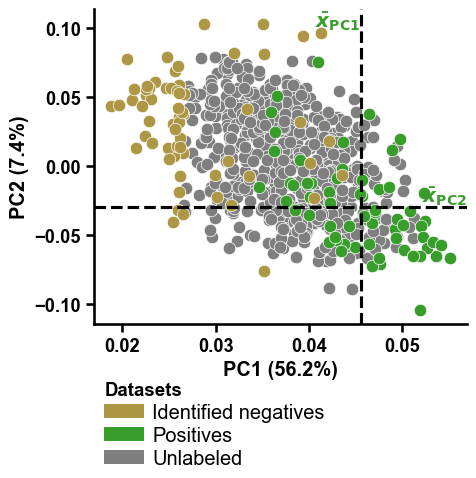

In [3]:
aa.plot_settings(font_scale=0.8)
dpul_plot.pca(df_pu=df_pu, labels=labels)
plt.tight_layout()
plt.show()

The dashed lines indicate the mean values across the positive samples for the PC1 and PC2, based on which the samples from the unlabeled group with the greatest distance were identified as reliable negatives by dPULearn. This becomes more clear using boolean masks and the ``show_pos_mean_x`` and ``show_pos_mean_y`` parameters: 

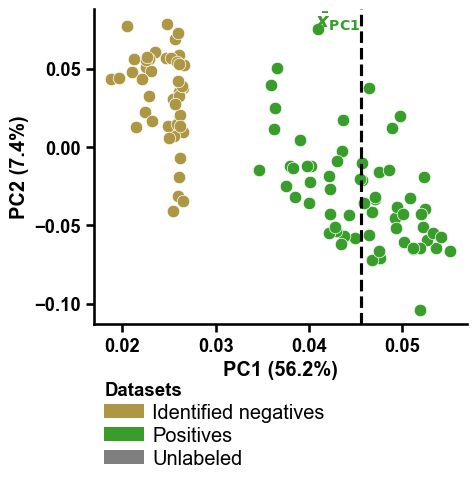

In [4]:
# Filter only positives and negatives selected based on PC1
mask1 = [x in ["PC1", None] for x in df_pu["selection_via"]]
mask2 = [x in [0, 1] for x in labels]
mask = [m1 and m2 for m1, m2 in zip(mask1, mask2)]
dpul_plot.pca(df_pu=df_pu[mask], labels=labels[mask], show_pos_mean_y=False)
plt.tight_layout()
plt.show()

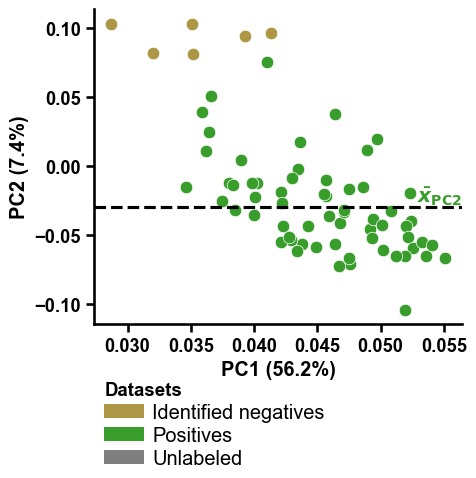

In [5]:
# Filter only positives and negatives selected based on PC1
mask1 = [x in ["PC2", None] for x in df_pu["selection_via"]]
mask2 = [x in [0, 1] for x in labels]
mask = [m1 and m2 for m1, m2 in zip(mask1, mask2)]
dpul_plot.pca(df_pu=df_pu[mask], labels=labels[mask], show_pos_mean_x=False)
plt.tight_layout()
plt.show()

You can change the PCs to be shown on the x- and y-axis by providing integers numbers to the ``pc_x`` and ``pc_y`` paramters:

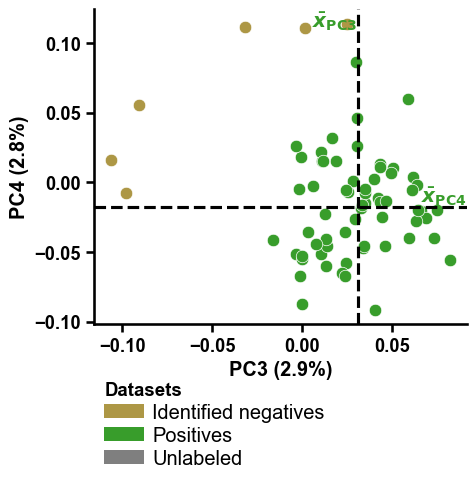

In [6]:
mask1 = [x in ["PC3", "PC4", None] for x in df_pu["selection_via"]]
mask2 = [x in [0, 1] for x in labels]
mask = [m1 and m2 for m1, m2 in zip(mask1, mask2)]
dpul_plot.pca(df_pu=df_pu[mask], labels=labels[mask], pc_x=3, pc_y=4)
plt.tight_layout()
plt.show()

Adjustment of ``colors`` and ``names`` must be aligned:

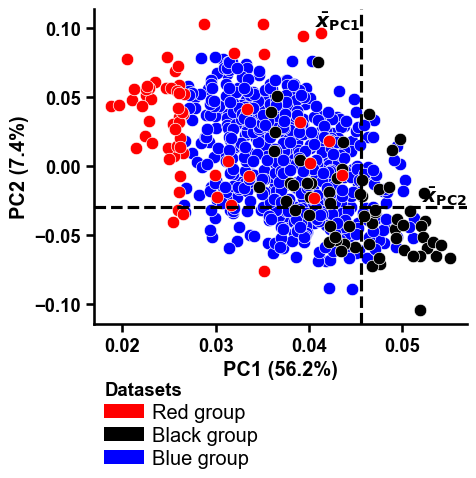

In [7]:
colors = ["r", "black", "b"]
names = ["Red group", "Black group", "Blue group"]
dpul_plot.pca(df_pu=df_pu, labels=labels, colors=colors, names=names)
plt.tight_layout()
plt.show()

The legend can be shifted along the y-axis using ``legend_y`` (default=-0.15), useful if the ``figsize`` (default=(5,5)) is adjusted: 

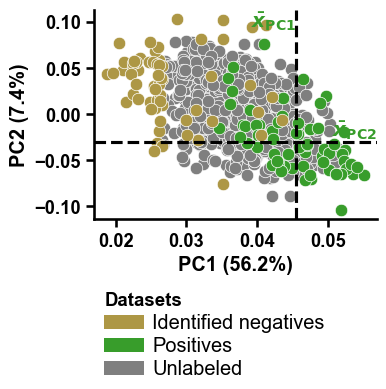

In [8]:
dpul_plot.pca(df_pu=df_pu, labels=labels, figsize=(4, 4), legend_y=-0.3)
plt.tight_layout()
plt.show()

The scatter plot using the ``args_scatter`` parameter, which is a key word argument dictionary passed to the internally called the ``plt.scatter`` class:

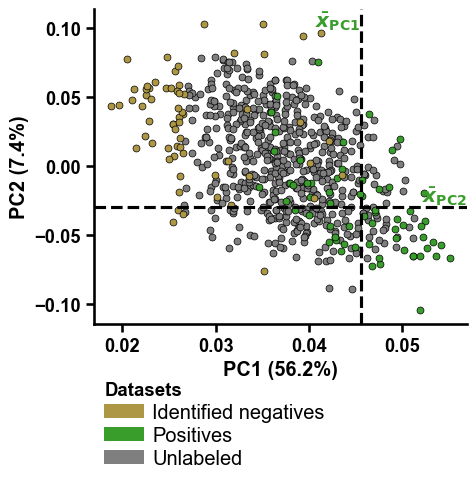

In [9]:
dpul_plot.pca(df_pu=df_pu, labels=labels, args_scatter={"s": 25, "edgecolor": "black"})
plt.tight_layout()
plt.show()

To change the legend, just disable it (setting ``legend=False``) and re-create it using the ``aa.plot_legend()`` function:

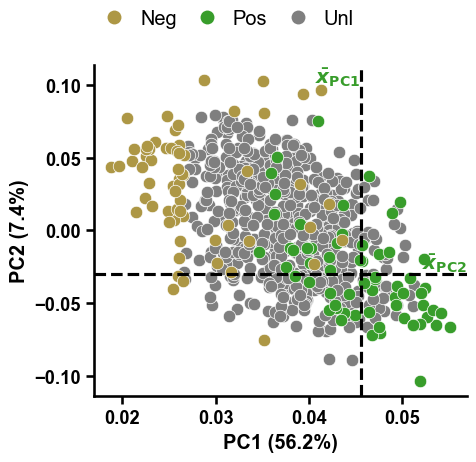

In [10]:
DICT_COLOR = aa.plot_get_cdict()
dict_color = {"Neg": DICT_COLOR["SAMPLES_REL_NEG"], "Pos": DICT_COLOR["SAMPLES_POS"], "Unl": DICT_COLOR["SAMPLES_UNL"]}
dpul_plot.pca(df_pu=df_pu, labels=labels, legend=False)
aa.plot_legend(dict_color=dict_color, y=1.2, handlelength=1, marker="o")
plt.tight_layout()
plt.show()